In [1]:
from whisperweranalysis.structure import LJSpeech
from whisperweranalysis.groundtruth import lj_valid
from whisperweranalysis.wer import compute

/home/smehta/anaconda3/envs/whisper/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from whisperweranalysis.mel_utilities import audio2mel

In [3]:
# audio2mel()

In [4]:
%load_ext autoreload
%autoreload 2

## Natural Speech

In [5]:
GT = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/NS/0')

In [6]:
compute(lj_valid, GT.transcriptions), GT.compute_wer(lj_valid)

(2.1778584392014517, 2.1778584392014517)

## Vocoded Speech

In [16]:
GT_Mel = LJSpeech.load_from_dir('../whisperweranalysis/LJ_Valid_transcription/GT/GT_MEL')

In [17]:
compute(lj_valid, GT_Mel.transcriptions)

1.9963702359346642

In [18]:
with open('temp_NS.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT.transcriptions])
    
with open('temp_NS_Vocoded.txt', 'w') as f:
    f.writelines([f'{x}\n' for x in GT_Mel.transcriptions])
    

## Plotting time

In [7]:
from collections import defaultdict
from pathlib import Path
from whisperweranalysis.checkpoint_mover import get_list_iter

In [8]:
TRANS_DIR = Path('../whisperweranalysis/LJ_Valid_transcription')

In [103]:
systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        lj_struct.compute_wer(lj_valid)
        systems[system.name][int(iter_.name)] = min(100, lj_struct.wer)
        # if int(iter_.name) > 50000:
        #     break

In [104]:

systems = {
    'Tacotron2': systems['Tacotron2'],
    'Glow': systems['Glow'],
    'OverFlow': systems['OverFlow'],
    'NS': systems['NS']
}

y_values, legend_labels = [], []
for model in systems:
    y_values.append([v for k, v in systems[model].items()])
    legend_labels.append(model)
    
x = sorted(list(get_list_iter()))

In [105]:
systems.keys()

dict_keys(['Tacotron2', 'Glow', 'OverFlow', 'NS'])

In [106]:
print(x)

[0, 500, 1000, 1500, 2000, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:166: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Sans Serif
findfont: Generic family 'san

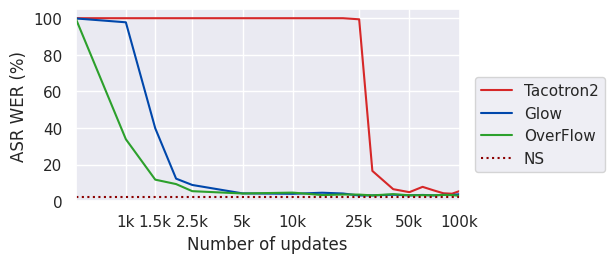

In [114]:
from whisperweranalysis.plotting.line import plot_lines
x_ticks = [0, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
x_tick_labels = ['0', '1k', '2.5k', '5k', '10k', '25k', '50k', '100k']
plot_colors = ['#d62728', '#0047AB', '#2ca02c', '#8b0000' ]
line_format = ['-', '-', '-', ':']
aspect_ratio = (2, 1)
output_filename = 'asr_wer.pdf'

plot_lines([x], y_values, x_label='Number of updates', y_label='ASR WER (%)', legend_label=legend_labels, line_format=line_format, plot_colors=plot_colors , aspect_ratio=aspect_ratio, x_ticks=x_ticks, x_tick_labels=x_tick_labels, file_name=output_filename, plot_log_x=True)